In [32]:
# to import the data that will be used later
import numpy as np
import pandas as pd

# read the data in the file and set the columns for these data
# data = pd.read_csv('dataInfo_2016_12.CSV',header=None, names=["date_time", "id","number"])
data = pd.read_csv('dataInfo_2017.CSV',header=None, names=["date_time", "id","number"])

In [33]:
# to show part of the data that readed from the file
data.head()

,date_time,id,number
0,2017/1/1 0:00,960111FF07FF104A,514286.406
1,2017/1/1 0:00,960111FF07FF127E,0.000
2,2017/1/1 0:00,960111FF07FF127F,0.000
3,2017/1/1 0:00,960111FF07FF1280,0.000
4,2017/1/1 0:00,960111FF07FF128E,0.000


In [34]:
# for the reason that the ID in the file can be divided into two parts, the first part is the number of this particular machine, the second part is the signal which implies the situation that this data get 
data['id'], data['sub_id'] = map(data['id'].str.slice, [0, 10 ], [10, 16])

In [35]:
# to show part of the ID that have been split
data.head()

,date_time,id,number,sub_id
0,2017/1/1 0:00,960111FF07,514286.406,FF104A
1,2017/1/1 0:00,960111FF07,0.000,FF127E
2,2017/1/1 0:00,960111FF07,0.000,FF127F
3,2017/1/1 0:00,960111FF07,0.000,FF1280
4,2017/1/1 0:00,960111FF07,0.000,FF128E


In [36]:
# to get the id of all the machines in this file
unique_id = data['id'].unique()
# print all the unique id
print('all ids for machines are as follows： \n',unique_id)
# print all the rows of the id of this file
print(data['id'])

all ids for machines are as follows： 
 ['960111FF07' '9601340000' '9601340101' '9601340102' '960111FF02'
 '960111FF03' '9601320B01' '960111FF04' '960111FF01' '9601210301'
 '9601430A01' '960111FF06' '960112FF01' '9601210302']
0          960111FF07
1          960111FF07
2          960111FF07
3          960111FF07
4          960111FF07
5          9601340000
6          9601340000
7          9601340000
8          9601340000
9          9601340000
10         9601340000
11         9601340000
12         9601340000
13         9601340000
14         9601340000
15         9601340101
16         9601340101
17         9601340101
18         9601340101
19         9601340101
20         9601340101
21         9601340000
22         9601340000
23         9601340000
24         9601340000
25         9601340000
26         9601340000
27         9601340000
28         9601340000
29         9601340000
              ...    
1048546    960111FF04
1048547    960111FF04
1048548    960111FF03
1048549    960111FF02
10485

In [37]:
# to get all the data of one particular machine 
Data=data[(data['id']=='960112FF01') & (data['sub_id']=='031011')]
Data.head()

,date_time,id,number,sub_id
364,2017/1/1 0:16,960112FF01,18.959999,031011
1495,2017/1/1 1:16,960112FF01,12.440000,031011
2529,2017/1/1 2:16,960112FF01,1.600000,031011
3690,2017/1/1 3:17,960112FF01,9.480000,031011
4808,2017/1/1 4:17,960112FF01,19.240000,031011


In [38]:
# to put all the data into a csv file
Data.to_csv('N_cur.csv')

In [39]:
# to get the data for this particular machine into csv file called "Data_2017.csv"
data = pd.read_csv('dataInfo_2017.CSV',header=None, names=["date_time", "id","number"])
Data_2017=data[(data['id']=='960112FF01031011')]
Data_2017.to_csv('N_cur_2017.csv')

In [40]:
Data = pd.read_csv('N_cur_2017.csv')
Data['date'] = pd.to_datetime(Data['date_time'], format='%Y-%m-%d')
Data=Data.set_index(['date'])
Data=Data.loc[:,'number']
print(Data.head())
# print(N_cur.dtypes)
# print(N_cur.index)

date
2017-01-01 00:16:00    18.959999
2017-01-01 01:16:00    12.440000
2017-01-01 02:16:00     1.600000
2017-01-01 03:17:00     9.480000
2017-01-01 04:17:00    19.240000
Name: number, dtype: float64


F:\anaconda\envs\individual-project\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


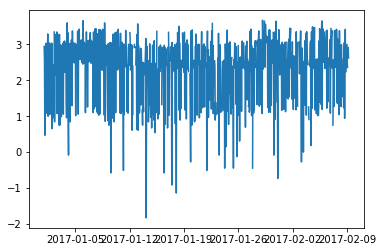

In [41]:
%matplotlib inline
# to show the general tendency of the log of the current change with the time
import matplotlib.pyplot as plt
Data_log = np.log(Data)
plt.plot(Data_log)

date
2017-01-01 00:16:00    18.959999
2017-01-01 01:16:00    12.440000
2017-01-01 02:16:00     1.600000
2017-01-01 03:17:00     9.480000
2017-01-01 04:17:00    19.240000
Name: number, dtype: float64


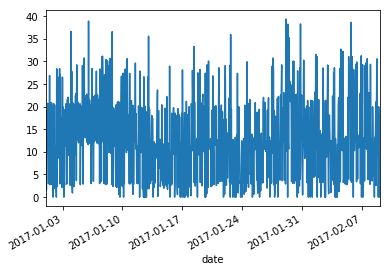

In [89]:
# to get the data that can be used in prediction model
from pandas import Series
from matplotlib import pyplot
import pandas as pd
# load dataset
series = Series.from_csv('N_cur_2017.csv', header=0)
series = pd.read_csv('N_cur_2017.csv')
series['date'] = pd.to_datetime(series['date_time'], format='%Y-%m-%d')
series=series.set_index(['date'])
series=series.loc[:,'number']
series.to_csv('N_cur_2017_01_02.csv')
print(series.head())
# print(N_cur.dtypes)
# display first few rows
# line plot of dataset

series.plot()
pyplot.show()

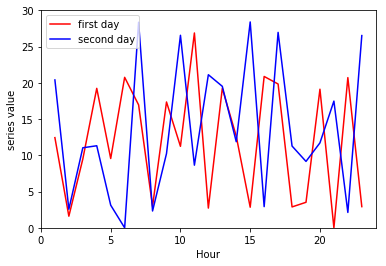

In [119]:
# to see the data on 2017-01-01
import datetime
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
import pandas as pd
import datetime

#print(series['2017-01-01'].head())
series['2017-01-01'].to_csv('first_day.csv')
series['2017-01-02'].to_csv('second_day.csv')
# to plot the data of the first day
first_day = Series.from_csv('first_day.csv', header=0)
first_day = pd.read_csv('first_day.csv')
timepoint = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.plot(timepoint,first_day['18.959999'],color = 'r')
plt.axis([0, 24, 0, 30])
# to plot the data of the first day
second_day = Series.from_csv('second_day.csv', header=0)
second_day = pd.read_csv('second_day.csv')
plt.plot(timepoint,second_day['1.92'],color = 'b')
plt.axis([0, 24, 0, 30])

# pretty up graph
plt.xlabel('Hour')
plt.ylabel('series value')
plt.legend(['first day','second day'],loc='best')
plt.show()


date
2017-01-02 00:22:00     1.92
2017-01-02 01:22:00    20.40
2017-01-02 02:22:00     2.56
2017-01-02 03:22:00    11.04
2017-01-02 04:23:00    11.32
Name: number, dtype: float64


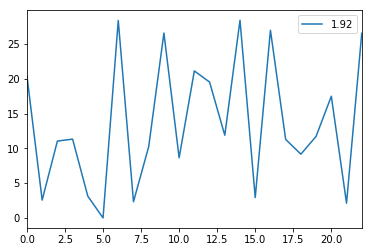

In [85]:
# to see the data on 2017-01-01
import datetime
print(series['2017-01-02'].head())
series['2017-01-02'].to_csv('second_day.csv')
series = Series.from_csv('second_day.csv', header=0)
series = pd.read_csv('second_day.csv')
series.plot()
pyplot.show()

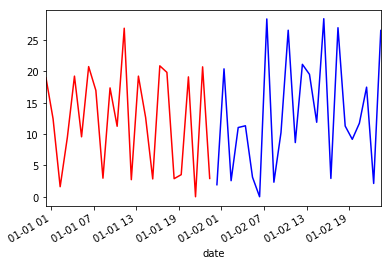

In [16]:
# to see the data in two days
series['2017-01-01'].plot(color = 'r',label= 'ah')
series['2017-01-02'].plot(color = 'b', label='gg')
pyplot.show()